<a href="https://colab.research.google.com/github/juliachen2357/ME592/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ME 592: Data Analytics and Machine Learning for Cyber-Physical Systems Homework 1








In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


the file structure should be the same as the following to run this homework:


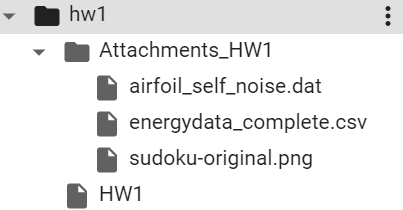

In [2]:
import cv2
from google.colab.patches import cv2_imshow
# last argument 1 is for rgb, 0 is for grayscale

print('the file structure should be the same as the following to run this homework:')
img = cv2.imread('/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/file_structure.PNG',1)
cv2_imshow(img)

2	Simple Programming & Exploratory Analytics
2.1	Images Task:
1.	Load sudoku-original.png image in grayscale mode.


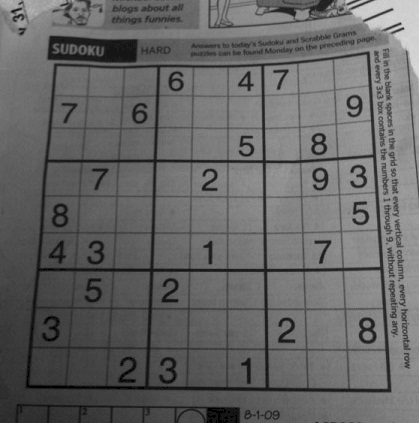

In [3]:
img = cv2.imread('/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/sudoku-original.png',0)
cv2_imshow(img)

In [4]:
print(img)

[[168 164 170 ... 206 206 206]
 [168 164 170 ... 205 205 205]
 [165 163 164 ... 206 206 206]
 ...
 [ 43  43  43 ... 130 133 136]
 [ 46  45  43 ... 132 134 134]
 [ 48  47  43 ... 132 132 131]]


2.	Plot the histogram of intensities.


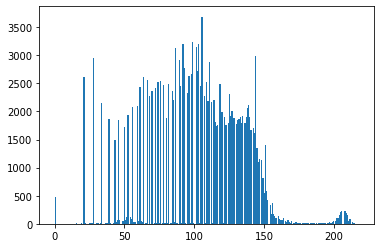

In [5]:
import matplotlib.pyplot as plt

plt.hist(img.flatten(), bins = 255)
plt.show()

3.	Choose 4 appropriate points and perform a Perspective Transformation to obtain the sudoku as a proper square.

# to make it run without bug, please click 
img = cv2.imread('/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/sudoku-original.png',1)
import matplotlib.pyplot as plt
import copy
def get_points(img):
  ok='n'
  while ok!='y':
    var=[0,0]
    img2=copy.deepcopy(img)

    var[0]=input('x: location:')
    var[1]=input('y: location:')
    img2[int(var[0])-10:int(var[0])+10,int(var[1])-10:int(var[1])+10,:]=[255,0,0]
    plt.imshow(img2);plt.show()
    print('is it ok?')
    ok=input('is it ok')
  return var
lt=get_points(img)
print(lt)
rt=get_points(img)
print(rt)
lb=get_points(img)
print(lb)
rb=get_points(img)
print(rb)


In [6]:
# if users do not want to choose the coordinate, they can directly use the following code and commit the upper next part.
lt=70,50
rt=60,370
lb=380,30
rb=385,385

(423, 419, 3)


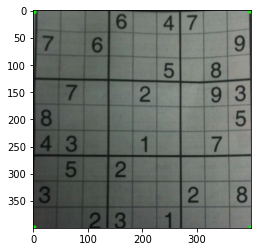

In [7]:
import cv2
from operator import itemgetter
from glob import glob
import numpy as np
paper = cv2.imread('/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/sudoku-original.png',1)
print(paper.shape)
# Coordinates that you want to Perspective Transform
pts1 = np.float32([[50,70],[370,60],[30,380],[385,385]])
# Size of the Transformed Image
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])
for val in pts1:
    cv2.circle(paper,(val[0],val[1]),5,(0,255,0),-1)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(paper,M,(400,400))
plt.imshow(dst)

2.2	Time Series
Data: Experimental data used to analyze appliances energy use in an energy efficient building. 

The data set is collected at a frequency of 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions at a period of around 3.3 min. Then, the wireless data was averaged for 10 minute periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the ex- perimental data sets using the date and time column. Random variable is included in the data set for testing the regression models and to filter out non predictive attributes (parameters). This data is adopted from the UCI machine learning repositories [1] and several aspects of the data were analyzed [2]. Our motivation is to explore some aspects of this time series data.
Task: Load the data (energydata complete.csv) and perform the following analysis.
 
1.	Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.


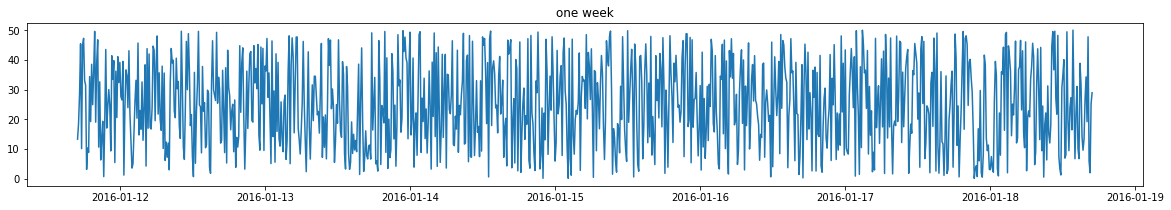

In [8]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
dt = datetime.datetime.strptime(data.iloc[0,0], '%m/%d/%Y %H:%M')
w=[[],[]]
for ele in range(0,len(data)):
    #print(data.iloc[ele,0])
    ct = datetime.datetime.strptime(data.iloc[ele,0], '%m/%d/%Y %H:%M')
    
    if (ct-dt).days>6:
        break
    else:
        w[0].append(ct)
        w[1].append(data.iloc[ele,-1])

plt.figure(figsize=(20,3));plt.plot(w[0],w[1]);plt.title('one week');plt.show();



     

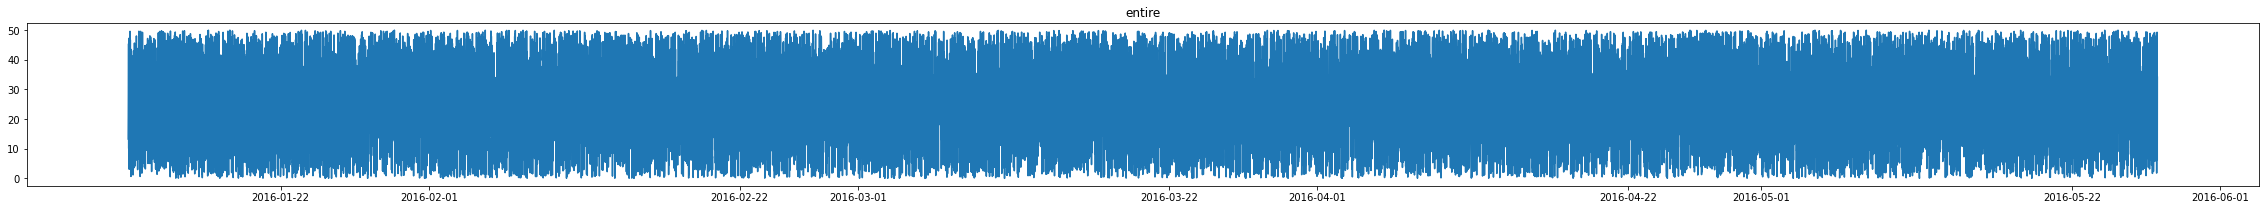

In [9]:
e=[[],[]]
for ele in range(0,len(data)):
    #print(data.iloc[ele,0])
    ct = datetime.datetime.strptime(data.iloc[ele,0], '%m/%d/%Y %H:%M')
    e[0].append(ct)
    e[1].append(data.iloc[ele,-1])
plt.figure(figsize=(40,3));plt.plot(e[0],e[1]);plt.title('entire');plt.show();

2.	Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.

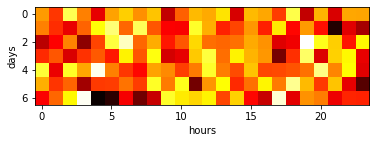

In [10]:
import pandas as pd
import datetime


import matplotlib.pyplot as plt
import numpy as np
wh=np.zeros((1,24*7))
for element in range(0,len(w[1]),6):
  wh[0,int(element/6)]=np.mean(w[1][element:element+6])
wh2=wh.reshape(7,24)

plt.imshow(wh2, cmap='hot', interpolation='nearest')
plt.xlabel("hours");plt.ylabel("days")
plt.show()

3.	Plot the histogram of energy consumption of appliances.

(array([1.075e+03, 6.387e+03, 4.842e+03, 2.220e+03, 1.714e+03, 8.320e+02,
        3.670e+02, 2.380e+02, 1.440e+02, 1.420e+02, 1.660e+02, 1.660e+02,
        1.690e+02, 1.420e+02, 1.960e+02, 1.230e+02, 1.210e+02, 1.050e+02,
        8.600e+01, 5.800e+01, 5.700e+01, 6.600e+01, 3.100e+01, 3.200e+01,
        2.600e+01, 2.400e+01, 1.900e+01, 3.200e+01, 4.100e+01, 1.400e+01,
        1.500e+01, 1.500e+01, 1.700e+01, 1.000e+01, 1.200e+01, 1.000e+01,
        7.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([  10. ,   31.4,   52.8,   74.2,   95.6,  117. ,  138.4,  159.8,
         181.2,  202.6,  224. ,  245.4,  266.8,  288.2,  309.6,  331. ,
         352.4,  373.8,  395.2,  416.6,  438. ,  459.4,  480.8,  502.2,
         523.6,  545. ,  566.4,  587.8,  609.2,  630.6,  652. ,  673.4,
         694.8,  716.2,  737.6,  759. ,  780.4,  801.8,  823.2,  844.6,
         866. , 

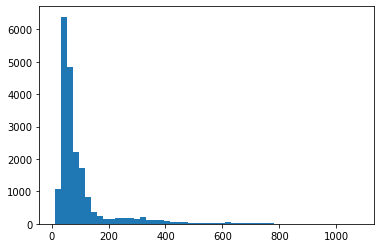

In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
dt = datetime.datetime.strptime(data.iloc[0,0], '%m/%d/%Y %H:%M')
e=[]
for ele in range(0,len(data)):
    e.append(data.iloc[ele,1])
plt.hist(e, bins=50)  

4.	Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

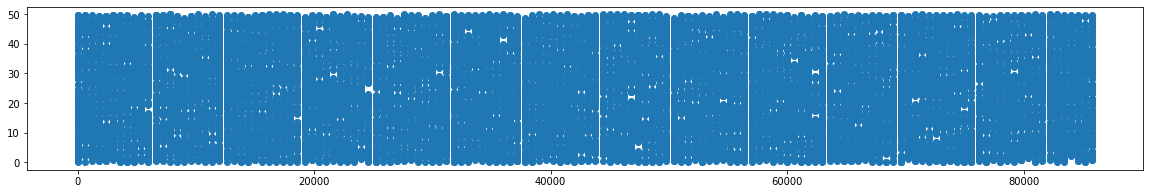

In [12]:

import urllib
import cv2

import pandas as pd
import datetime
import matplotlib.pyplot as plt
e_per_NMS=[[],[]]
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
for ele in range(0,len(data)):
    new_t = datetime.datetime.strptime(data.iloc[ele,0], '%m/%d/%Y %H:%M')
    e_per_NMS[0].append(new_t.hour*60*60+new_t.minute*60+new_t.second)
    e_per_NMS[1].append(data.iloc[ele,-1])

plt.figure(figsize=(20,3));plt.plot(e_per_NMS[0],e_per_NMS[1],'o')


5.	Plot appliances energy consumption vs. Press mm Hg.

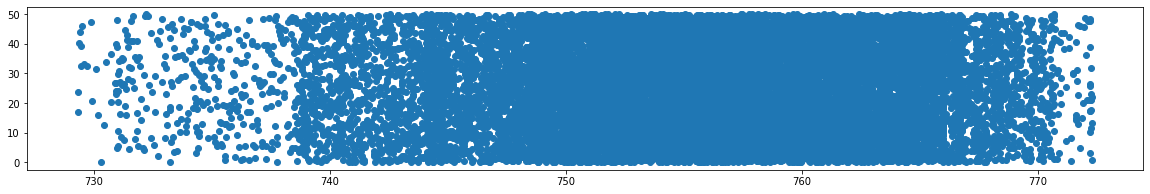

In [13]:
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
current_day=datetime.datetime.strptime('1/10/2016 00:00', '%m/%d/%Y %H:%M')
pg=[];ap=[]
for ele in range(0,len(data)):
    pg.append(data.iloc[ele,-1])
    ap.append(data.iloc[ele,22])

plt.figure(figsize=(20,3));plt.plot(ap,pg,'o')

6.	It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.


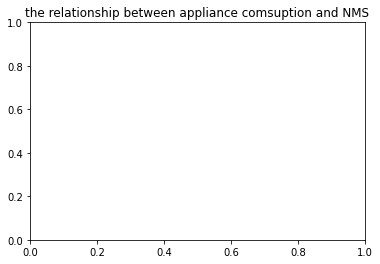

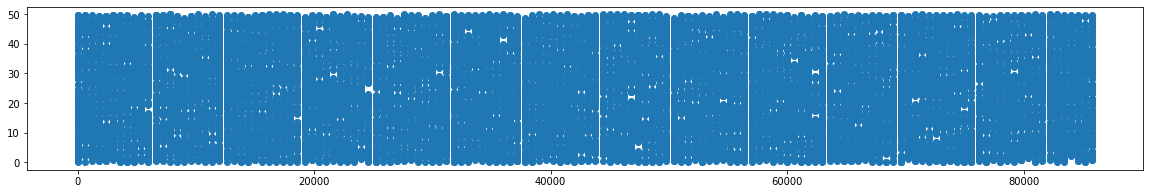

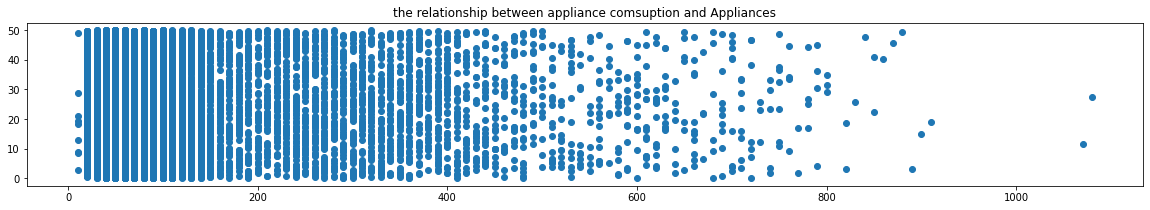

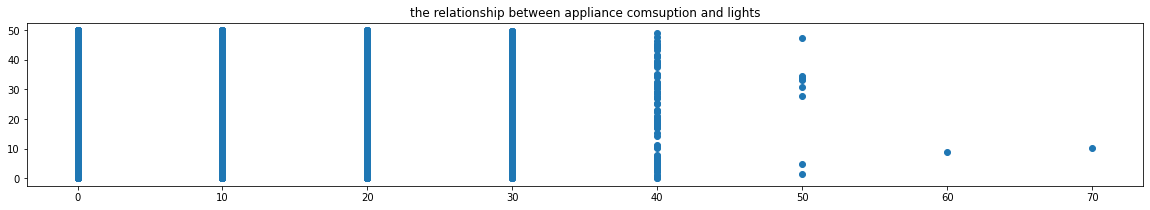

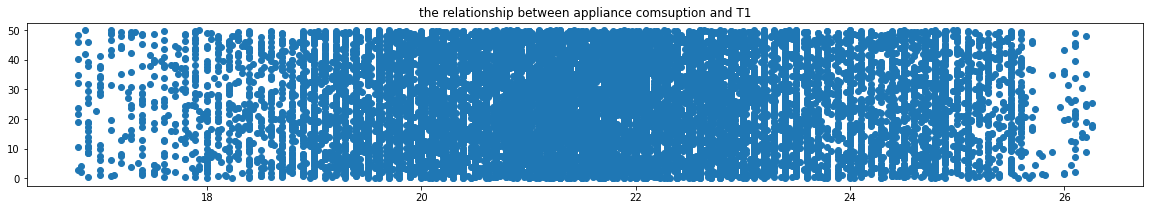

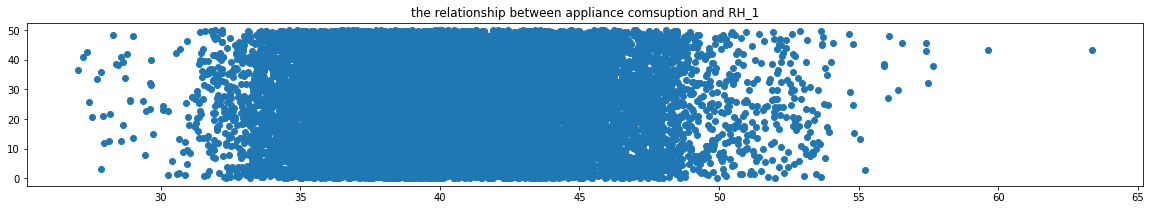

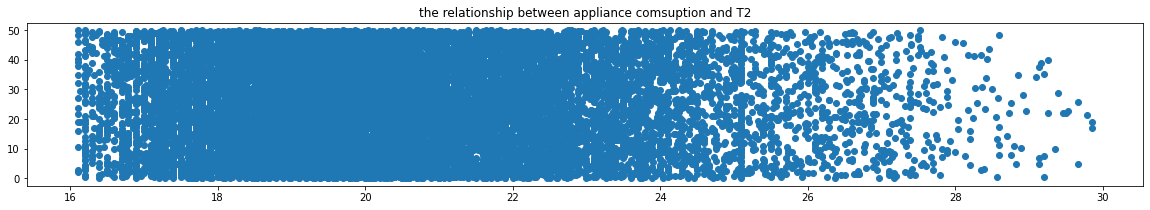

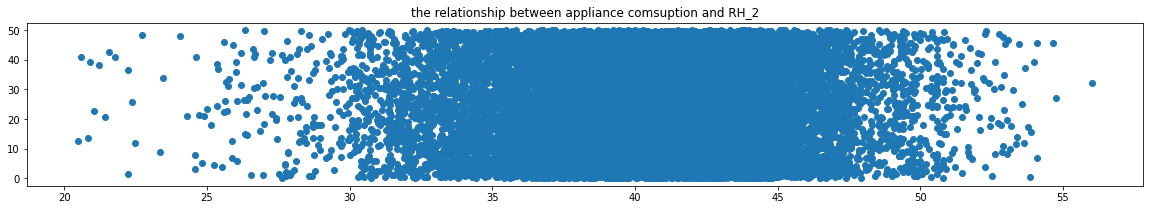

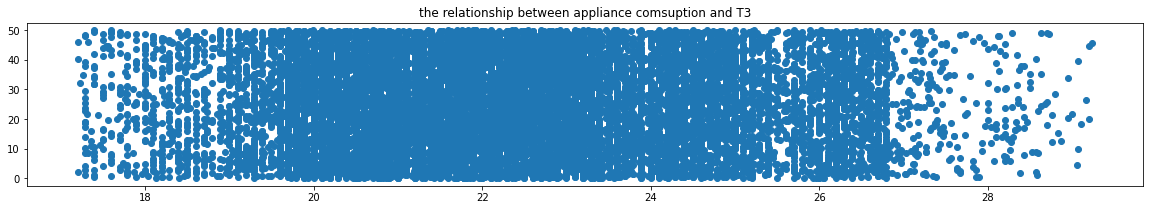

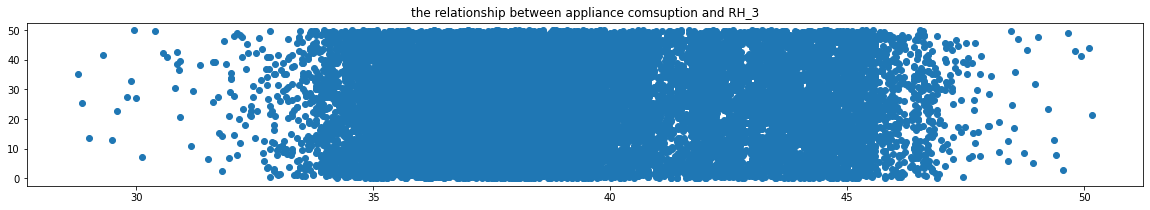

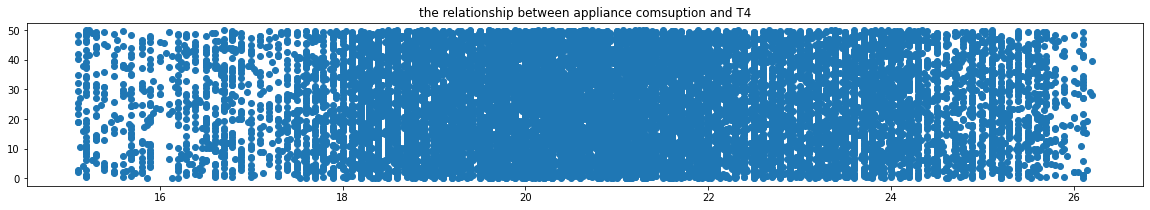

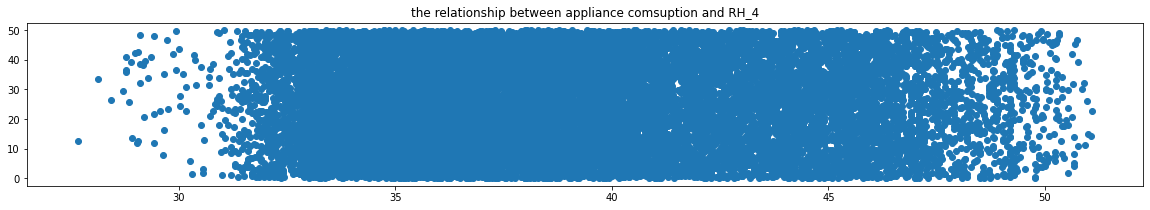

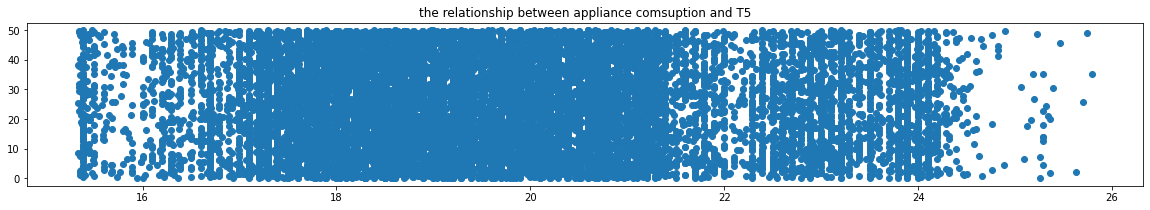

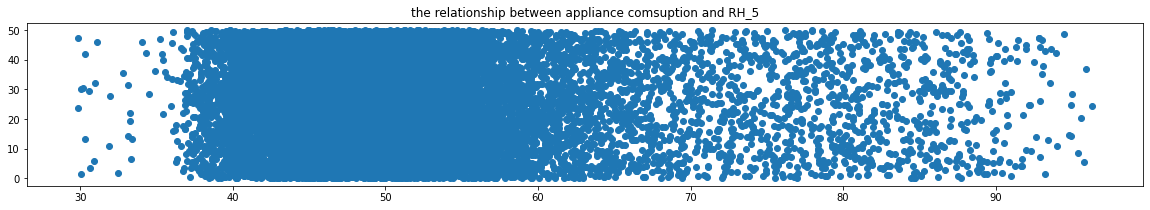

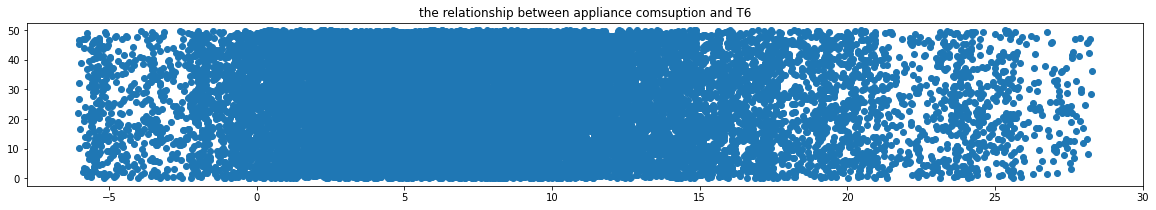

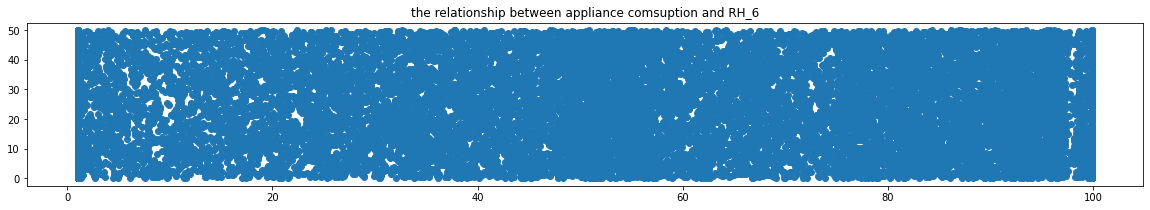

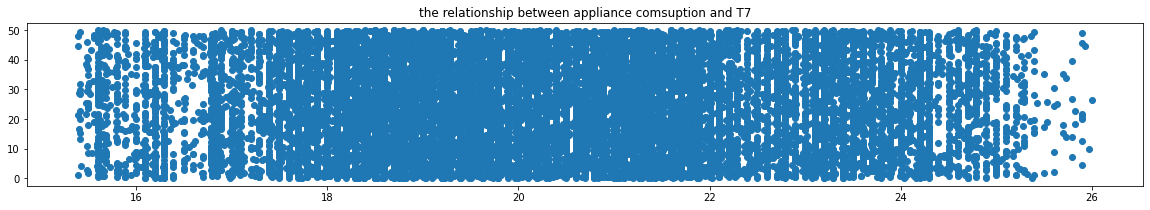

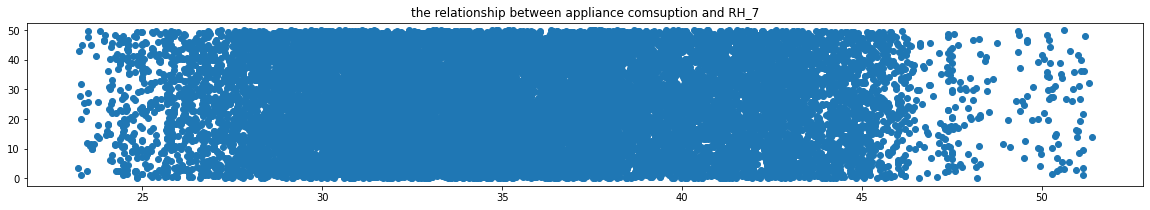

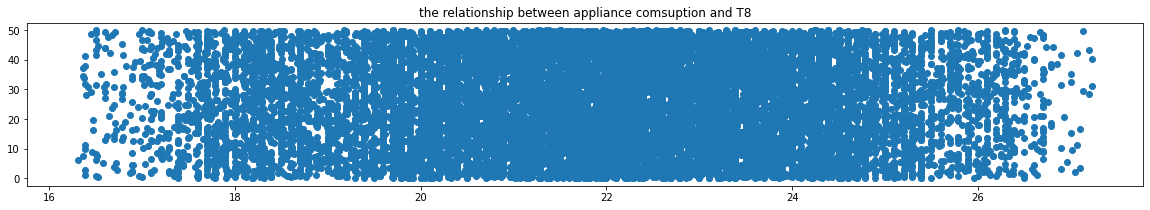

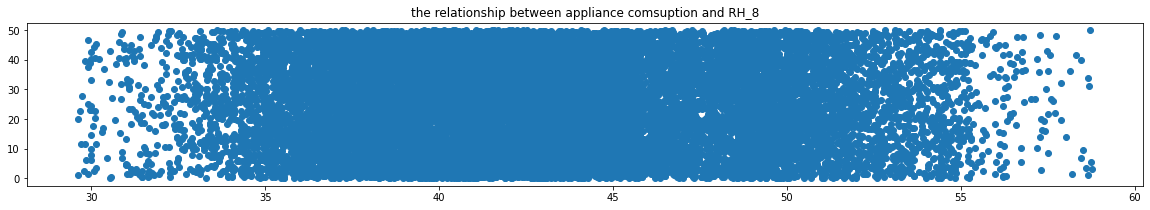

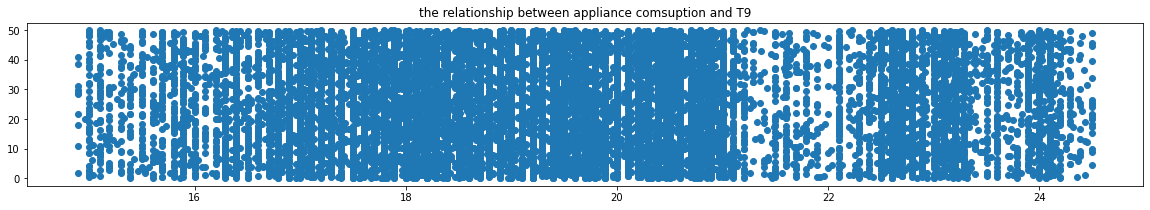

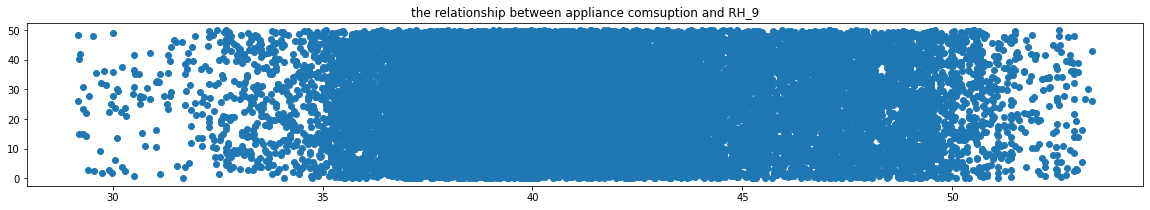

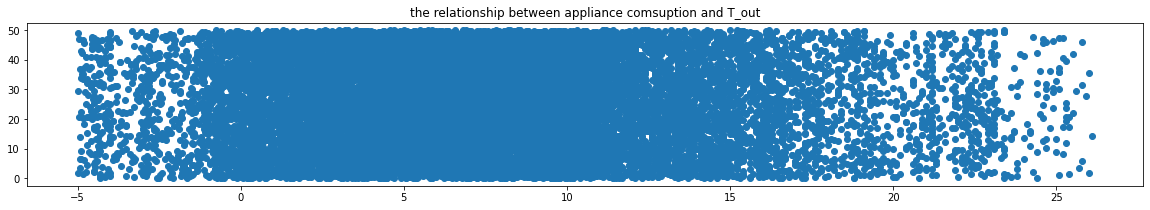

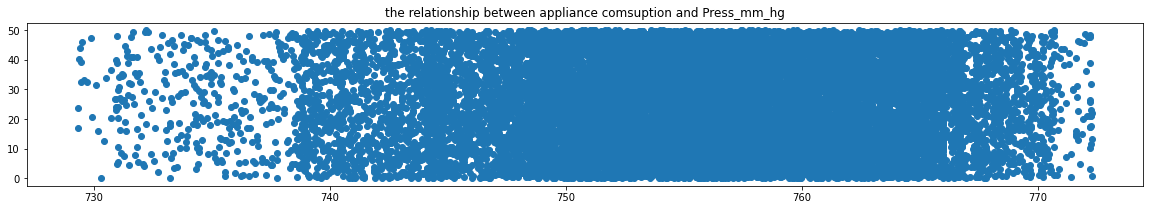

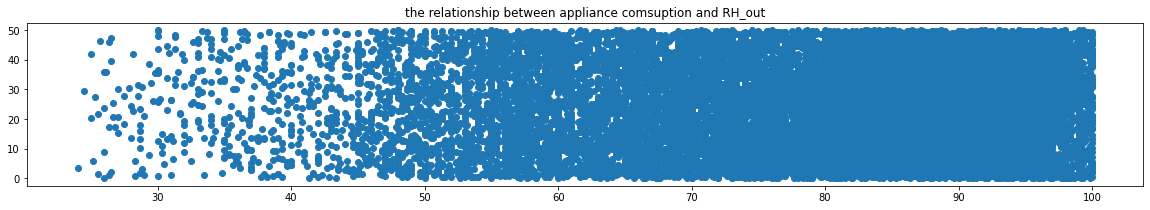

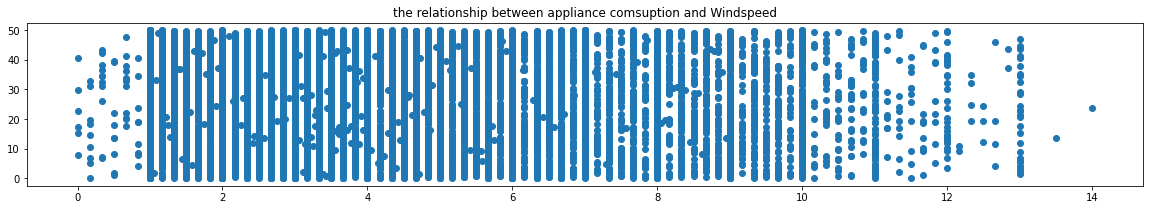

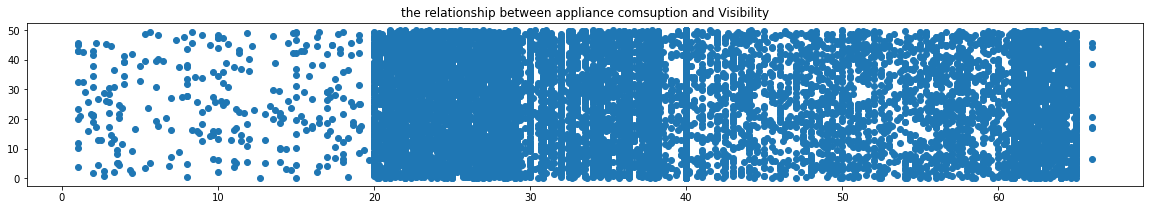

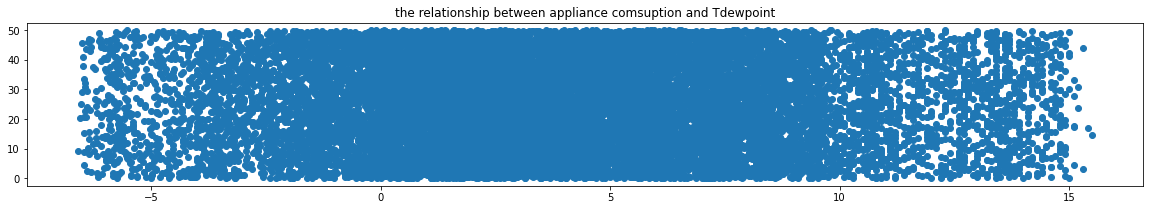

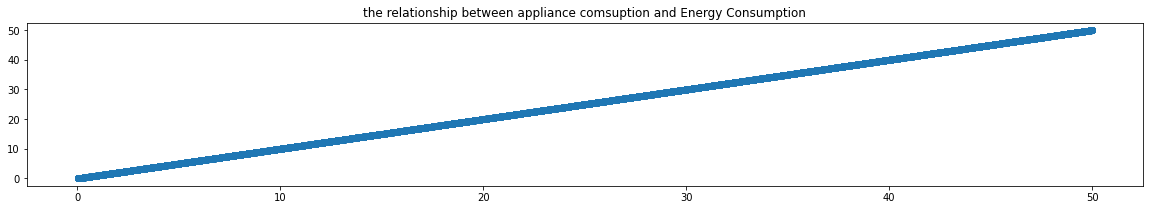

In [17]:
en_dic={}
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
features=['date','Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','Energy Consumption']
for i in range(0,28):
    en_dic[i]=[]
for ele in range(0,len(data)):
      ct = datetime.datetime.strptime(data.iloc[ele,0], '%m/%d/%Y %H:%M')
      en_dic[0].append(ct)
for i in range(1,28):
    for ele in range(0,len(data)):
        en_dic[i].append(data.iloc[ele,i])
import urllib
import cv2

import pandas as pd
import datetime
import matplotlib.pyplot as plt
e_per_NMS=[[],[]]
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
for ele in range(0,len(data)):
    new_t = datetime.datetime.strptime(data.iloc[ele,0], '%m/%d/%Y %H:%M')
    e_per_NMS[0].append(new_t.hour*60*60+new_t.minute*60+new_t.second)
    e_per_NMS[1].append(data.iloc[ele,-1])
    plt.title("the relationship between appliance comsuption and NMS")
plt.figure(figsize=(20,3));plt.plot(e_per_NMS[0],e_per_NMS[1],'o')
for i in range(1,28):   
    plt.figure(figsize=(20,3));plt.plot(en_dic[i],en_dic[27],'o')
    plt.title("the relationship between appliance comsuption and "+  features[i])
    plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import statsmodels.api as sm
en_dic={}
data = pd.read_csv("/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/energydata_complete.csv")
features=['date','Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','Energy Consumption']
for i in range(0,28):
    en_dic[i]=[]
for ele in range(0,len(data)):
      ct = datetime.datetime.strptime(data.iloc[ele,0], '%m/%d/%Y %H:%M')
      
      en_dic[0].append(ct.hour*60*60+ct.minute*60+ct.second)
for i in range(1,28):
    for ele in range(0,len(data)):
        en_dic[i].append(data.iloc[ele,i])
X=np.ones((len(en_dic[0]),27))*10
for i in range(0,27):
    X[:,i]=X[:,i]+en_dic[i]
Y=en_dic[27]
model = sm.OLS(Y,X).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[0.72182062 0.37798116 0.80303417 0.79006127 0.48937812 0.67418021
 0.51152037 0.73950548 0.70525644 0.50949758 0.65157842 0.1987319
 0.1147153  0.73055635 0.63077342 0.72543028 0.56038474 0.92459484
 0.54585367 0.09038212 0.03706921 0.45265006 0.00145882 0.26189434
 0.76024609 0.295205   0.33711606]


In [22]:
for i in range(0,27):
  print(features[i]+':'+ str(model.pvalues[i]))

date:0.7218206154268121
Appliances:0.37798116280266725
lights:0.8030341688959652
T1:0.7900612732831718
RH_1:0.48937811670855436
T2:0.6741802090157925
RH_2:0.51152037199373
T3:0.7395054800759338
RH_3:0.7052564394182961
T4:0.5094975849854475
RH_4:0.6515784235642001
T5:0.19873189825961862
RH_5:0.11471530254618874
T6:0.7305563515003863
RH_6:0.630773420411399
T7:0.7254302774275065
RH_7:0.5603847447574599
T8:0.9245948449318832
RH_8:0.5458536662264688
T9:0.09038212249500739
RH_9:0.037069209032516474
T_out:0.4526500582642836
Press_mm_hg:0.00145881533061072
RH_out:0.2618943405718808
Windspeed:0.7602460946155845
Visibility:0.2952050027674642
Tdewpoint:0.3371160626313603


From the p-value, we can see that NMS has a closer relation to the engergy consumption, lights,T1, and etc also has a high p-value. Hg's contribution is not very large but the reason could be the data is not normalized.  

In [31]:
from sklearn import preprocessing
import numpy as np
X_2=np.ones((len(en_dic[0]),27))
for i in range(0,27):
  data=X[:,i]
  X_2[:,i] =(data - np.min(data)) / (np.max(data) - np.min(data))
print(X_2)

[[0.71328671 0.04672897 0.42857143 ... 0.5        0.95384615 0.53846154]
 [0.72027972 0.04672897 0.42857143 ... 0.47619048 0.89487179 0.53393665]
 [0.72727273 0.03738318 0.42857143 ... 0.45238095 0.83589744 0.52941176]
 ...
 [0.74125874 0.24299065 0.14285714 ... 0.26190476 0.37435897 0.90045249]
 [0.74825175 0.38317757 0.14285714 ... 0.27380952 0.38717949 0.8959276 ]
 [0.75524476 0.39252336 0.14285714 ... 0.28571429 0.4        0.8959276 ]]


In [32]:
Y=en_dic[27]
model = sm.OLS(Y,X_2).fit()
for i in range(0,27):
  print(features[i]+':'+ str(model.pvalues[i]))

date:0.4753811565133065
Appliances:0.6015175453770805
lights:0.9064903242870819
T1:0.5881885490598147
RH_1:0.9370246686184627
T2:0.40631986666994935
RH_2:0.1404571871697077
T3:0.665499227909218
RH_3:0.6470005366836133
T4:0.20891835161262043
RH_4:0.9363182581052004
T5:0.014987163604261264
RH_5:0.32125456154914206
T6:0.8779003533621466
RH_6:0.8557491567182873
T7:0.9819191173054933
RH_7:0.7711917397361965
T8:0.7006294870706319
RH_8:0.5878499979820986
T9:0.145147167165903
RH_9:0.03540160980115385
T_out:1.9761099314604877e-21
Press_mm_hg:0.02338106167349738
RH_out:5.727419236257441e-45
Windspeed:0.012732911146586217
Visibility:0.491485610132369
Tdewpoint:1.6930533432223615e-46


After normalization, we can see the contributions of each feature to the energy consumption and find which is the major contributor.

In [15]:
!pip install scipy

2.3	Multi-variate
Data: The NASA data set comprises different sizes of NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. This problem has the following inputs:
1.	Frequency, in Hz.

2.	Angle of attack, in degrees.
3.	Chord length, in meters.
4.	Free-stream velocity, in meters per second.
5.	Suction side displacement thickness, in meters.
The only output is Scaled sound pressure level, in decibels.

Task: Load the data and Compute the following descriptive statistics of the data:
1.	Mean
2.	Variance (or Standard Deviation)
 
3.	Median
4.	Kurtosis
5.	Skewness
6.	Range

In [16]:
data=[]
def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False
with open('/content/drive/MyDrive/ME592/assignments/hw1/Attachments_HW1/airfoil_self_noise.dat', 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split("\t")
        data.append([float(i) if is_float(i) else float(i) for i in k]) 

data = np.array(data, dtype='O')

from scipy.stats import kurtosis
from scipy.stats import skew
data_name=['Frequency','Angle', 'Chord', 'velocity', 'Suction', 'sound_pressure']
#description=['Mean','Variance','Median','Kurtosis','Skewness','Range']
for i in range(0,6):
    print('mean of '+data_name[i]+'is:'+ str(np.mean(data[:,i])))
    print('Variance of '+data_name[i]+'is:'+ str(np.var(data[:,i])))
    print('Median of '+data_name[i]+'is:'+ str(np.median(data[:,i])))
    print('Kurtosis of '+data_name[i]+'is:'+ str(kurtosis(data[:,i])))
    print('Skewness of '+data_name[i]+'is:'+ str(skew(data[:,i])))
    print('Range of '+data_name[i]+'is:'+ str(np.mean(data[:,i])))

mean of Frequencyis:2886.3805721889553
Variance of Frequencyis:9932104.79728063
Median of Frequencyis:1600.0
Kurtosis of Frequencyis:5.685722427734408
Skewness of Frequencyis:2.134950926813799
Range of Frequencyis:2886.3805721889553
mean of Angleis:6.782302062541517
Variance of Angleis:35.00093761467936
Median of Angleis:5.4
Kurtosis of Angleis:-0.41556767886739054
Skewness of Angleis:0.6884764219408639
Range of Angleis:6.782302062541517
mean of Chordis:0.13654823685961226
Variance of Chordis:0.008744046262693109
Median of Chordis:0.1016
Kurtosis of Chordis:-1.0385036986844494
Skewness of Chordis:0.45700080866497894
Range of Chordis:0.13654823685961226
mean of velocityis:50.860745176314175
Variance of velocityis:242.35026211936523
Median of velocityis:39.6
Kurtosis of velocityis:-1.562742714498816
Skewness of velocityis:0.23561696725663772
Range of velocityis:50.860745176314175
mean of Suctionis:0.011139880391217556
Variance of Suctionis:0.000172813605609254
Median of Suctionis:0.00495